# Introduction

There are 2 datasets that serperatly span 3 years, 2018, 2019, 2021* : 
<br>
NSDUH - National Survey on Drug Use and Health which contains data on mental health
<br>
Core Trends - Pew Research Core trends survey which contains data on social media use

*2020 was not included because the Core Trends survey for that year doesn't exist.

With this data we are trying to answer whether there is a correlation between Social Media use and negative Mental health outcomes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ml_analysis import to_numeric, predictUsageOfAgeGroups
from helper_code import *

# EDA

# Visual 1

##### Read in datasets

In [2]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)
/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)
/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


##### Get all columns valuable to us
After manually going through the codebooks and choosing variables that we want to analyze, we simply create a deep copy of the read-in DF with only the selected columns.

In [3]:
NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, NSDUH201819Cols)
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, NSDUH201819Cols)
NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, NSDUH2021Cols)

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)
CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)
CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

##### Clean up data
This is where we clean up the datasets and convert it to a more usable format. Code is in helper_code.py
<br><br>
CoreTrends Dataset:
<br>First all data is converted to numeric.
<br>Drop 'sns2a' column because all values are empty.
<br>Remove values over 98 because those indicate a refused or skipped answer.
<br>Cut the age data into bins representing ranges of ages to match with NSDUH.
<br>Melt the data into longform, using selected id and values (in this case age and web1a...web1e).
<br>Convert the values from ints to more descriptive value (1->Uses Social Media, 2->Doesnt Use Social Media), this eliminates a manual labeling step later
Drop null values.
<br><br>
NSDUH Dataset:
<br>First all data is converted to numeric.
<br>Remove values over 85 because those indicate a refused or skipped answer.
<br>Cut the age data into matching bins as CoreTrends
<br>Cut the desired column values into two bins for more relevant/consistent data since most values are in a range.
<br>Melt the data into longform, using selected id and values (in this case either AGE2/AGE3 depending on year, and desired mental health column)
<br>Rename AGE2/AGE3 column to age, for consistency
<br>Drop null values


In [4]:
CoreTrends_id = ['age']
CoreTrends_values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
NSDUH_id=['AGE2']
NSDUH_values = ['DSTCHR12']

CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, CoreTrends_id, CoreTrends_values)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, CoreTrends_id, CoreTrends_values)
NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,NSDUH_id,NSDUH_values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,['AGE3'],NSDUH_values)


##### Get Percentages

In [5]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018)
percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019)
percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018)
SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019)
SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021])
NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])

##### Display final graph

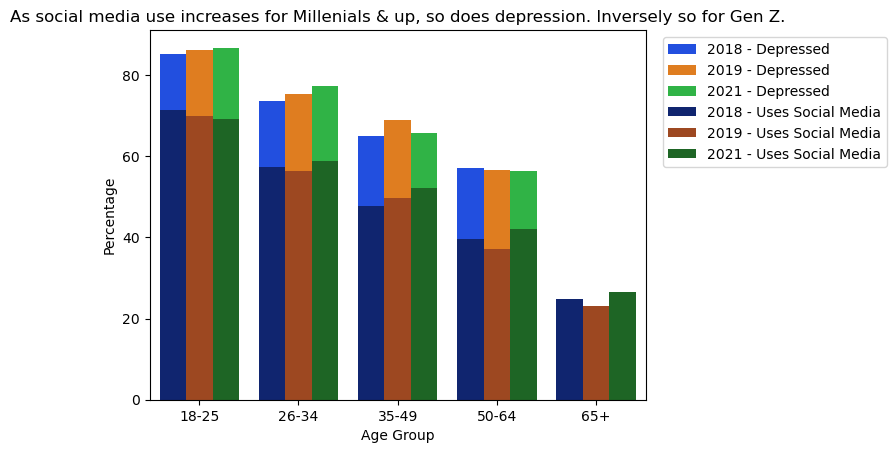

In [6]:
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright')
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')

plt.title("As social media use increases for Millenials & up, so does depression. Inversely so for Gen Z.")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

*Note: For transparency, in this graph we used the variable DSTCHR12 in NSDUH which represents how often someone felt sad in their worst month within the year, as opposed to DSTCHR30 which is the same but only in the past 30 days. We believe this is more relevant/accurate as it accounts for the most sad someone has been throughout the year, rather than simply the past month. Therefore it should provide a better idea on any more generalized trends throughout the years. Also for this project report specifically, we labeled this as "Depression" to be concise. We may change this label in the future if there's another way to label it more appropriately. 

The most interesting result from this data is non-obvious trends when looking at how social media usage changed throughout the 3 years compared to the percentage of people depressed within the age ranges.

For 18-25 year olds (roughly Gen Z), there was an inverse correlation. The percentage of those depressed consistently increased, while social media usage consistently decreased.

However for ages 26-49 (roughly Millenials & Gen X), both depression and social media usage percentages increased.

For ages 50-64, Depression remained relatively unchaged while social media usage increased. And for ages 60+ there was no data on Depression so a correllation cannot be made, unless we interpret that as people 65+ refusing to acknowledge mental health which would be an interesting result.

The most surprising result is regarding Gen Z having the inverse correlation with depression and social media usage, as one may have expected a result similar to those for Millenials/Gen X. However, what isn't surprising is the fact that the percentages of those depressed decreases throughout the generations as younger people are often more willing/open to acknowledge and in some cases even embrace their mental health struggles.

# Machine Learning

In [2]:
nsduh2018 = pd.read_csv('datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv')
cleaned = to_numeric(nsduh2018, 'intfreq')
pred = predictUsageOfAgeGroups(cleaned)

Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

       18-24       0.45      0.43      0.44       101
       25-34       0.21      0.26      0.24       136
       35-44       0.20      0.05      0.09       129
       45-54       0.26      0.07      0.11       155
       55-64       0.23      0.10      0.14       157
         65+       0.36      0.81      0.50       215

    accuracy                           0.32       893
   macro avg       0.29      0.29      0.25       893
weighted avg       0.28      0.32      0.26       893

Confusion Matrix:
[[ 43  33   1   1   1  22]
 [ 27  36  10   6  12  45]
 [ 12  32   7   9   9  60]
 [  4  30   9  11  18  83]
 [  4  22   5   8  15 103]
 [  6  15   3   7  10 174]]


After feeding the 2018 Core Trends data frame to the SVM model, we get a very low accuracy number. We're not entirely sure why this could be the case, but due to these results we plan on using Recursive Feature Elimination to help with finding the right columns to feed the model. For the results above, we are feeding it the internet frequency, the age, and which social medias they specifically use. There could be other responses that could help like, income, race, and marital status which are in the data.
This data frame has good features such as how much said users use certain social medias, 5 being rarely and 1 being several times a day. Which is what we're trying to predict, which social media is used the most amongst age groups.

What we plan to do is merge all the years, 2018, 2019 and 2021 to give the model more data to have a better accuracy score. However, some of the newer tests added new questions so the combined data frame has to be merged together and cleaned for it to inputted properly.